Q 1.
Ans: - Matrix multiplication we can be performed in many types, but for now we focus on the row-to-column method. In this approach, we compute each element of the resulting matrix by multiplying corresponding elements from the rows of the first matrix and columns of the second matrix.

Given matrix A(nxk) and matrix B(kxm). The product of these matrices is matrix C with dimensions (nxm). For each element Cij in matrix C, we calculate it by taking the i-th row of matrix A and the j-th column of matrix B, then performing element-wise multiplication and summing the results. Specifically, each element Cij is the sum of the products of corresponding elements from the row of A and the column of B. Since there are nxm elements in the resulting matrix C and each element requires k multiplications, the total number of multiplications required for matrix multiplication is **[n x m x k]**.
And this involve **[k-1]** addition, since summing k terms involves k-1 additions.

in the end: -
-> Each of the nxm entries in C requires k multiplications. Therefore, the total number of multiplications is [nxmxk].
-> Each of the nxm entries in C requires k-1 additions. Therefore, the total number of additions is [nxmx(k-1)].

Q 2.

ans: -

In [132]:
import time
# By using list of lists and python code
a=[[1,2,9,1,10],[3,4,5,2,7],[20,3,8,1,4]]
b=[[1,2],[7,4],[5,6],[2,9],[4,1]]
d=[[0,0],[0,0],[0,0]]

start_time = time.time()
for i in range(len(a)):
  for j in range(len(b[0])):
    for k in range(len(b)):
      d[i][j]+=a[i][k]*b[k][j]
for i in d:
  print(i)
end_time = time.time()
print("----------")

# time complexity
python_time = end_time - start_time
print(python_time)

[102, 83]
[88, 77]
[99, 113]
----------
0.00855398178100586


In [125]:
# By using numpy
a=[[1,2,9,1,10],[3,4,5,2,7],[20,3,8,1,4]]
b=[[1,2],[7,4],[5,6],[2,9],[4,1]]
start_time = time.time()
e=np.dot(a,b)
print(e)
end_time=time.time()
print("----------")

python_time=end_time-start_time
print(python_time)

[[102  83]
 [ 88  77]
 [ 99 113]]
----------
0.0010328292846679688


in this we can easily show that the numpy is faster then the list.
the reason of fast speed of numpy: - Numpy is able to divide a task into multiple subtasks and process them parallelly. Numpy functions are implemented in C. Which again makes it faster compared to Python Lists. also numpy totally based on broadcasting.[i learn it by google and shiva verma book]

Q 3.

ans: -

Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, the time complexity of the code is: -o(n**2)

because when the number of element is even then median= n/2th highest term and ((n/2)+1)th highest term which will require (n/2+1) passes of the array.
or number of elemnt is odd then median=((n+1)/2)th highest term and require ((n+1)/2) passes of the array. so time complexity=o(n**2)

For better we can use quick sort algorithm for sorting the array then time comlexity for sorting the array is eqaual to O(nlog(n)) and then the time compexity for finding the meadian is equal to O(1). so totally time complexity is euals to O(nlog(n))

In [158]:
import time

a=[3,6,2,4,6,7,8,9,9,7,6,5,5,4,4,3,3,2,3,45,6,7,8,9,9,8,7,5,5,4]

start_time=time.time()
def partition(arr,start,end):
    pivot=arr[start]
    i=start+1
    j=end
    while i<=j:
        while i<=end and arr[i]<pivot:
            i+=1
        while j>=start and arr[j] > pivot:
            j-=1
        if i<=j:
            arr[i],arr[j]=arr[j],arr[i]
            i+=1
            j-=1
    if i<=end:
        arr[i-1],arr[start]=arr[start],arr[i-1]
        return i-1
    else:
        arr[end],arr[start]=arr[start],arr[end]
        return end

def quick_sort(arr,start,end):
    if end<=start:
        return arr
    index=partition(arr,start,end)
    quick_sort(arr,start,index-1)
    quick_sort(arr,index+1,end)

quick_sort(a,0,len(a)-1)
if len(a)%2:
  median=a[(len(a)-1)//2]
else:
  median=(a[(len(a)//2)-1]+a[(len(a)//2)])/2
end_time=time.time()
python_time=end_time-start_time
print(python_time)


0.0008072853088378906


In [159]:
start_time=time.time()
b=np.median(a)
end_time=time.time()
print(b)

python_time=end_time-start_time
print(python_time)

6.0
0.0002944469451904297


So i clear say that the running time by numpy.median comes less rather than using quick sort and the reason i write in 2nd question

Q 4.

Ans: -  The gradient of the following function with respect to x = 2xy+cos(x)*(y3)

The gradient of the following function with respect to y = (x2)+3*(y2)*sin(x)


Q 5.

Ans: -

In [35]:
## first i calculate the gradiend for any value of x and y then check it with the value which comes from jax: -
import jax
import math
from jax import grad
import jax.numpy as np
def function(x,y):
  return ((x**2)*y)+((y**3)*np.sin(x))

x=np.array(1.0)
y=np.array(3.0)

# by Q 4 gradient with respect to x =
res_x=2*x*y+math.cos(x)*(y**3)
print("By putting value of x in q 4: ",res_x)

# by Q 4 gradient with respect to y =
res_y= (x**2)+3*(y**2)*math.sin(x)
print("By putting value of y in q 4: ",res_y)

grax=jax.grad(function,argnums=0) # for with respect to x
gray=jax.grad(function,argnums=1) # for y

gradientx=grax(x,y)
gradienty=gray(x,y)
print("with the help of jax: ",gradientx)
print("with the help of jax: ",gradienty)

By putting value of x in q 4:  20.588161
By putting value of y in q 4:  23.719715
with the help of jax:  20.588161
with the help of jax:  23.719715


Q 6.

Ans: -

In [5]:
import sympy as sp
import numpy as np

sp.init_printing()
x,y = sp.symbols('x y')
def gradient(function):
  return (function.diff(x),function.diff(y))

function=(x**2)*y+((y**3)*sp.sin(x))
gradient=gradient(function)
gradient

⎛         3          2      2       ⎞
⎝2⋅x⋅y + y ⋅cos(x), x  + 3⋅y ⋅sin(x)⎠

Q 7.

Ans: -

In [ ]:
dic={
    2022:{
        "branch_1": {
            "Roll_number":{
                "name":{"Tanuj":{
                    "math":100,"English":70
                    }
                }
            }
        },
        "branch_2": {
            "Roll_number":{
                "name":{"Rahul":{
                    "math":90,"English":80
                    }
                }
            }
        }
    },

  2023:{
        "branch_1": {
            "Roll_number":{
                "name":{"Harsh":{
                    "math":85,"English":75
                    }
                }
            }
        },
        "branch_2": {
            "Roll_number":{
                "name":{"Mukesh":{
                    "math":90,"English":95
                    }
                }
            }
        }
    },
    2024:{
        "branch_1": {
            "Roll_number":{
                "name":{"devanshu":{
                    "math":80,"English":70
                    }
                }
            }
        },
        "branch_2": {
            "Roll_number":{
                "name":{"sai":{
                    "math":90,"English":75
                    }
                }
            }
        }
    },
    2025:{
        "branch_1": {
            "Roll_number":{
                "name":{"Siddhesh":{
                    "math":60,"English":90
                    }
                }
            }
        },
        "branch_2": {
            "Roll_number":{
                "name":{"Rahul":{
                    "math":90,"English":80
                    }
                }
            }
        }
    }
}
dic

Q 8.

Ans: - # Till now i have a little bit knowledge about python classes so i am not able to write the answer of this question

Q 9.

Ans: -

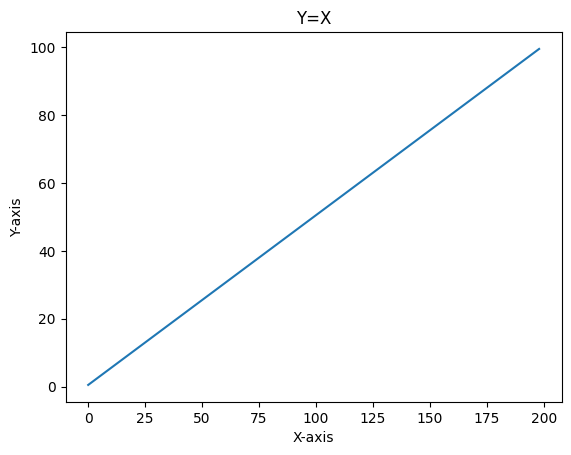

In [42]:
import matplotlib.pyplot as plt

#1.
x=np.arange(0.5,100,0.5)
y=x
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Y=X")
plt.plot(y)
plt.show()

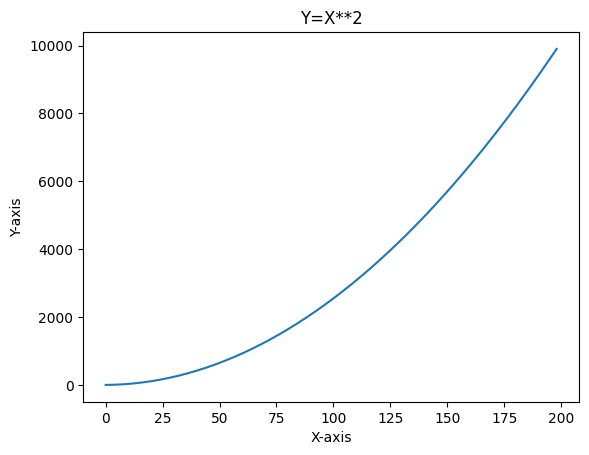

In [23]:
x=np.arange(0.5,100,0.5)
y=x**2
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Y=X**2")
plt.plot(y)
plt.show()

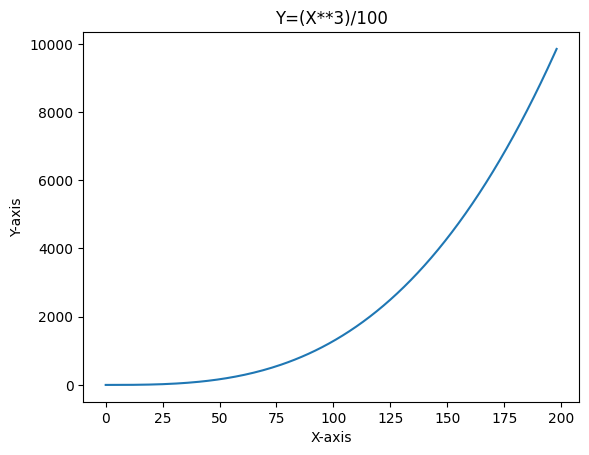

In [25]:
x=np.arange(0.5,100,0.5)
y=(x**3)/100
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Y=(X**3)/100")
plt.plot(y)
plt.show()

In [ ]:
x=np.arange(0.5,100,0.5)
y=x
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Y=X")
plt.plot(y)
plt.show()

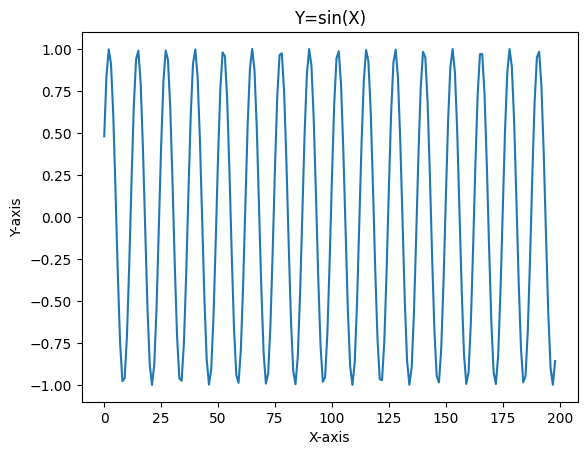

In [35]:
import math
x=np.arange(0.5,100,0.5)
y=np.sin(x)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Y=sin(X)")
plt.plot(y)
plt.show()

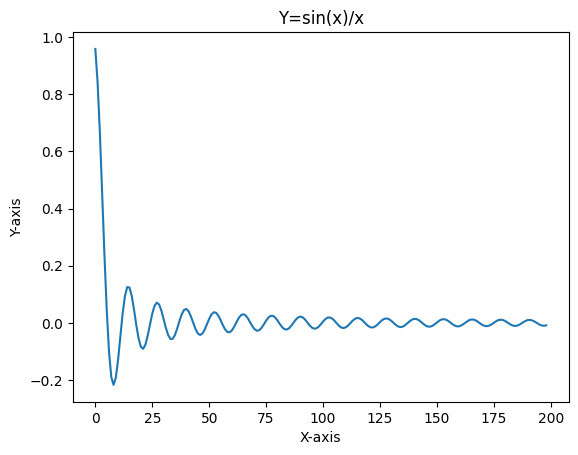

In [39]:
x=np.arange(0.5,100,0.5)
y=np.sin(x)/x
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Y=sin(x)/x")
plt.plot(y)
plt.show()

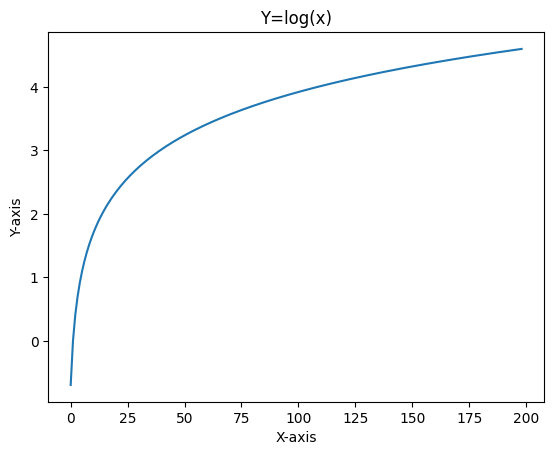

In [40]:
x=np.arange(0.5,100,0.5)
y=np.log(x)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Y=log(x)")
plt.plot(y)
plt.show()

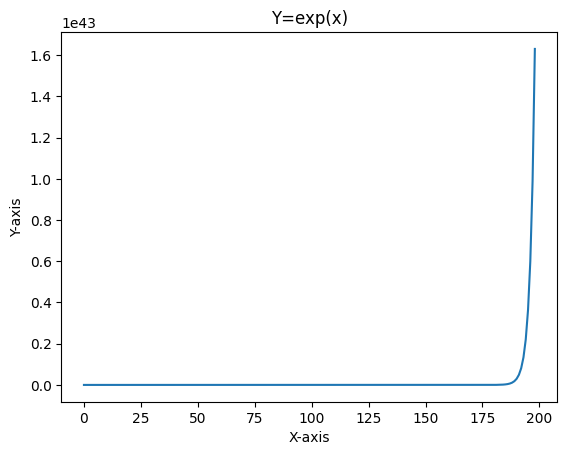

In [57]:
x=np.arange(0.5,100,0.5)
y=np.exp(x)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Y=exp(x)")
plt.plot(y)
plt.show()

Q 10.

Ans: -

In [113]:
import numpy as np
import pandas as pd

matrix=np.random.uniform(1,2,size=(20,5))
print(matrix)
data=pd.DataFrame(matrix,columns=["a","b","c",
"d","e"])
print(data)
h=data[["a","b","c","d"]].std().idxmax()
print("column name: ",h)

[[1.17463499 1.78514867 1.17083006 1.64441008 1.03234216]
 [1.54903436 1.77804283 1.25036293 1.36046085 1.65793701]
 [1.35321593 1.74026008 1.48873084 1.24743047 1.76396297]
 [1.08013182 1.87048091 1.71794971 1.52677212 1.47837668]
 [1.42283689 1.67977957 1.91353543 1.08545393 1.92122242]
 [1.76304954 1.77656858 1.04030667 1.40262464 1.15034584]
 [1.66523117 1.59886329 1.93888212 1.87676099 1.21591911]
 [1.73806068 1.3867985  1.6205709  1.56976563 1.62459852]
 [1.06642476 1.37531687 1.08102679 1.78494768 1.54088007]
 [1.00444641 1.90942555 1.14696559 1.7168528  1.73653299]
 [1.1817125  1.8480078  1.75766187 1.01304894 1.35999711]
 [1.25883241 1.03716165 1.86418791 1.61758208 1.98848195]
 [1.56211346 1.73906767 1.08509794 1.22769441 1.01689895]
 [1.86026103 1.95492107 1.32861358 1.46564555 1.46014739]
 [1.16878489 1.65879719 1.34442882 1.88744692 1.24068269]
 [1.77996785 1.58220326 1.15827313 1.07241162 1.95805452]
 [1.32960141 1.28215267 1.52700853 1.58173378 1.15701246]
 [1.31761815 1

Q 11.

Ans: -

In [112]:
data["f"]=data["a"]+data["b"]+data["c"]+data["d"]+data["e"]

data["g"]=np.where(data["f"]<8,"LT8","GT8")
print(data)

count=data["g"].value_counts()["LT8"]
print(count)

std1=data[data["g"]=="LT8"]["f"].std()
std2=data[data["g"]=="GT8"]["f"].std()
print("LT8: ", std1, "GT8: ",std2)

           a         b         c         d         e         f    g
0   1.147621  1.204658  1.240755  1.164488  1.508424  6.265946  LT8
1   1.873427  1.391185  1.897046  1.744030  1.032537  7.938225  LT8
2   1.202623  1.819127  1.284907  1.957516  1.480629  7.744802  LT8
3   1.995047  1.492282  1.855065  1.109445  1.928199  8.380039  GT8
4   1.817035  1.078191  1.800171  1.732229  1.948075  8.375702  GT8
5   1.674866  1.653107  1.144628  1.790397  1.218367  7.481366  LT8
6   1.809203  1.695508  1.180281  1.013863  1.661902  7.360757  LT8
7   1.496587  1.932479  1.223693  1.167809  1.689664  7.510232  LT8
8   1.544632  1.549694  1.644228  1.964682  1.379770  8.083007  GT8
9   1.733163  1.116458  1.042689  1.243395  1.541633  6.677337  LT8
10  1.080741  1.470758  1.962969  1.400499  1.018603  6.933570  LT8
11  1.260822  1.739827  1.394198  1.022007  1.337151  6.754005  LT8
12  1.278761  1.860165  1.366026  1.632352  1.074186  7.211489  LT8
13  1.088618  1.843592  1.330519  1.129669  1.73

Q 12.

Ans: -

Broadcasting: -we want to apply some sort of scaling to all these data every parameter gets its scaling factor or every parameter is multiplied by some factor.

In [111]:
A=np.array([5, 7, 3, 1])
B=np.array([90, 50, 0, 30])
C=A*B
print(C)

#In this we can see that if we multiply a with b then every elemet of a multiply with same index elemnt of b

#we can see it in other way: - by adding 5 in any array then we get the each element of this array increased by same facter i.e. 5

D=np.array([1,2,4,6,8])
E=D+5
print(E)

[450 350   0  30]
[ 6  7  9 11 13]


Q 13.

Ans: -

In [110]:
# for 1D array
a=np.array([10,2,1,6,8])
b=np.argmin(a)
print(b)

# for 2D array
a=[[2,1,4],[5,0,3]]
c=np.argmin(a, axis=0) # it gives the index column wise means in first column 2 is min so index is 0, in second column 0 in min so index is 1 and so on..
d=np. argmin (a, axis=1) # it gives the index row-wise means in the first row 1 is min, so the index is 1, in the second row 0 is min, so the index is 1 and so on.
print(c,d)

2
[0 1 1] [1 1]
